<a href="https://colab.research.google.com/github/mgomez270/MLGuia2/blob/main/Proyecto_final_Paciente_continua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Librerias

In [424]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

###Carga de Datos

In [425]:
file_path = '/content/ML 1 (1).csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')

In [426]:
data.head(2)

,Viaje del Paciente,Localidad,Estado Cita,Cod Triage,Ocupacion Pac,Grupo Etario Mayor,Edad Pac,Tipo Convenio,Sexo Pac,Cod Diagnostico,Nombre Diagnostico,Recuento definido de Paciente,Cantidad Prestacion,Valor Prestacion,Margen,paciente continua
0,AMBULATORIO,SUBA,NaN,NaN,ABOGADO,Adulto,71.0,MEDICINA PREPAGADA,F,I10,HIPERTENSION ESENCIAL (PRIMARIA),1,28.0,1.191.085,"56,30%",0
1,AMBULATORIO,SUBA,RECEPCIONADO,NaN,ABOGADO,Adulto,71.0,PAGO DIRECTO,F,I10,HIPERTENSION ESENCIAL (PRIMARIA),1,2.0,88.000,"-24,64%",0


In [427]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19860 entries, 0 to 19859
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Viaje del Paciente             19860 non-null  object 
 1   Localidad                      6364 non-null   object 
 2   Estado Cita                    8684 non-null   object 
 3   Cod Triage                     5787 non-null   float64
 4   Ocupacion Pac                  18997 non-null  object 
 5   Grupo Etario Mayor             19860 non-null  object 
 6   Edad Pac                       19857 non-null  float64
 7   Tipo Convenio                  19851 non-null  object 
 8   Sexo Pac                       19859 non-null  object 
 9   Cod Diagnostico                19860 non-null  object 
 10  Nombre Diagnostico             19860 non-null  object 
 11  Recuento definido de Paciente  19860 non-null  int64  
 12  Cantidad Prestacion            19860 non-null 

##Limpieza Preliminar

arreglamos el campo margen y valor prestación que aparece como object

In [428]:
def porcentaje_a_decimal(porcentaje):
    return float(porcentaje.replace(',', '').strip('%'))/10000

data['Margen'] = data['Margen'].apply(porcentaje_a_decimal)

data['Valor Prestacion'] = data['Valor Prestacion'].str.replace('.', '').astype(float)

data['Edad Pac'].fillna(0, inplace=True)  # Reemplaza NaN por 0
data['Edad Pac'] = data['Edad Pac'].astype(int)

In [429]:
data.describe(include='all')

,Viaje del Paciente,Localidad,Estado Cita,Cod Triage,Ocupacion Pac,Grupo Etario Mayor,Edad Pac,Tipo Convenio,Sexo Pac,Cod Diagnostico,Nombre Diagnostico,Recuento definido de Paciente,Cantidad Prestacion,Valor Prestacion,Margen,paciente continua
count,19860,6364,8684,5787.000000,18997,19860,19860.000000,19851,19859,19860,19860,19860.0,19860.000000,1.986000e+04,19860.000000,19860.000000
unique,7,34,2,NaN,292,2,NaN,14,2,241,241,NaN,NaN,NaN,NaN,NaN
top,AMBULATORIO,USAQUEN,RECEPCIONADO,NaN,AMA (O) DE CASA,Adulto,NaN,COMPANIA DE SEGUROS,F,I10,HIPERTENSION ESENCIAL (PRIMARIA),NaN,NaN,NaN,NaN,NaN
freq,11398,3151,8659,NaN,4507,18927,NaN,5936,10692,3389,3389,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.119406,NaN,NaN,55.662387,NaN,NaN,NaN,NaN,1.0,17.990676,1.978032e+06,-0.493049,0.348943
std,NaN,NaN,NaN,0.720843,NaN,NaN,20.151467,NaN,NaN,NaN,NaN,0.0,61.218125,1.185477e+07,69.833017,0.476648
min,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.0,0.000000,1.000000e+03,-9839.249800,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,1.0,1.000000,1.117680e+05,-0.144350,0.000000
50%,NaN,NaN,NaN,3.000000,NaN,NaN,58.000000,NaN,NaN,NaN,NaN,1.0,2.000000,3.862640e+05,0.120700,0.000000
75%,NaN,NaN,NaN,4.000000,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,1.0,12.000000,1.034159e+06,0.366400,1.000000


Borramos los campos valor prestación y cantidad prestación dado que es dato que no tenemos en una etapa inicial del paciente y borramos recuento de paciente que no aporta nada


In [430]:
data.drop(columns=['Recuento definido de Paciente','Nombre Diagnostico','Cantidad Prestacion','Valor Prestacion','Margen','Grupo Etario Mayor'], inplace=True)

#Analísis Exploratorio

<ipython-input-431-776421988e83>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
<ipython-input-431-776421988e83>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)


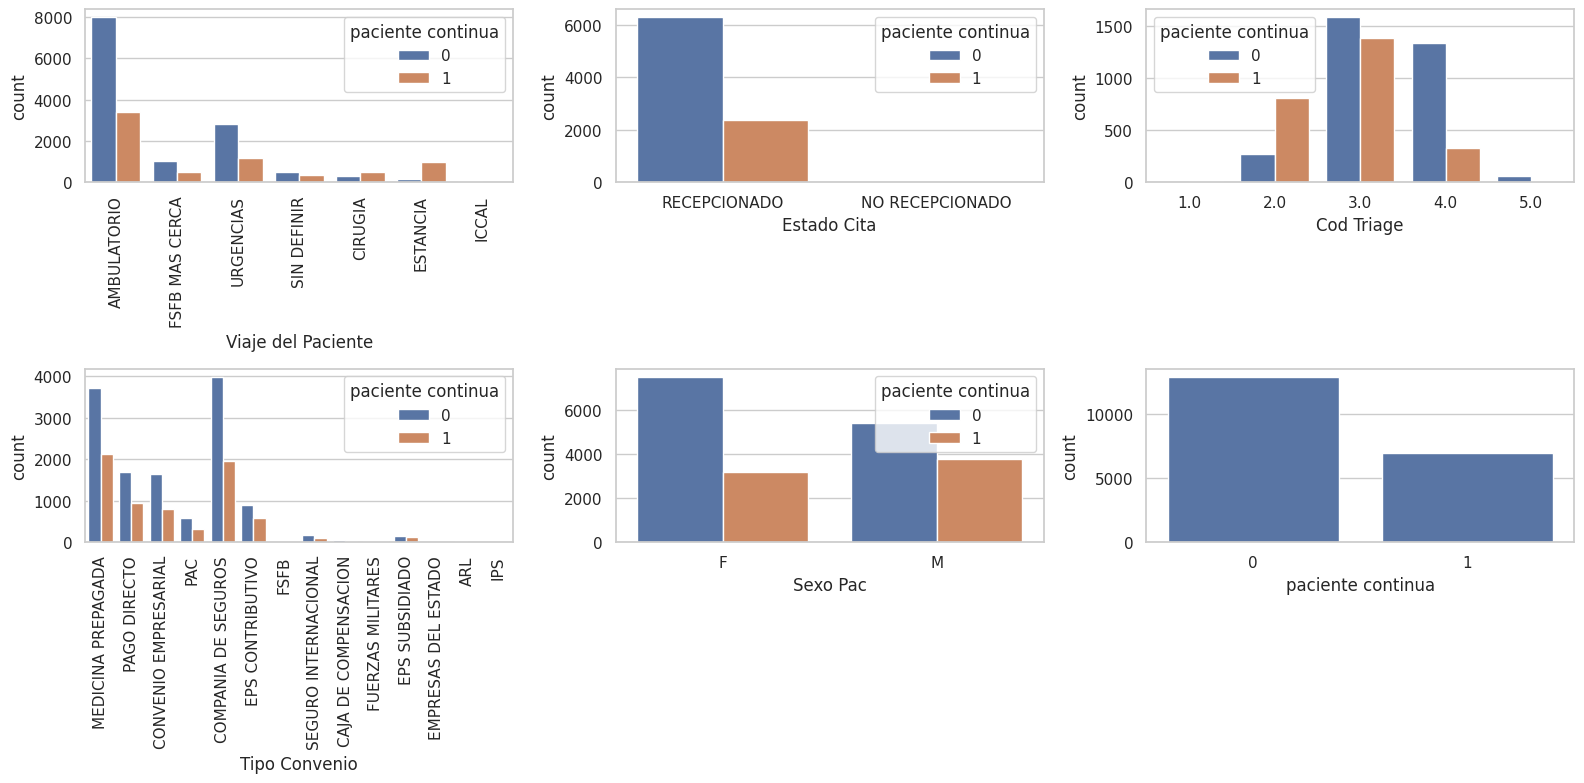

In [431]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8),)

sns.countplot(x='Viaje del Paciente', data=data, ax=axes[0, 0],hue='paciente continua')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

sns.countplot(x='Estado Cita', data=data, ax=axes[0, 1],hue='paciente continua')

sns.countplot(x='Cod Triage', data=data, ax=axes[0, 2],hue='paciente continua')

sns.countplot(x='Tipo Convenio', data=data, ax=axes[1, 0],hue='paciente continua')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

sns.countplot(x='Sexo Pac', data=data, ax=axes[1, 1],hue='paciente continua')

sns.countplot(x='paciente continua', data=data, ax=axes[1, 2])


plt.tight_layout()
plt.show()


<ipython-input-432-535018c37b1e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
<ipython-input-432-535018c37b1e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


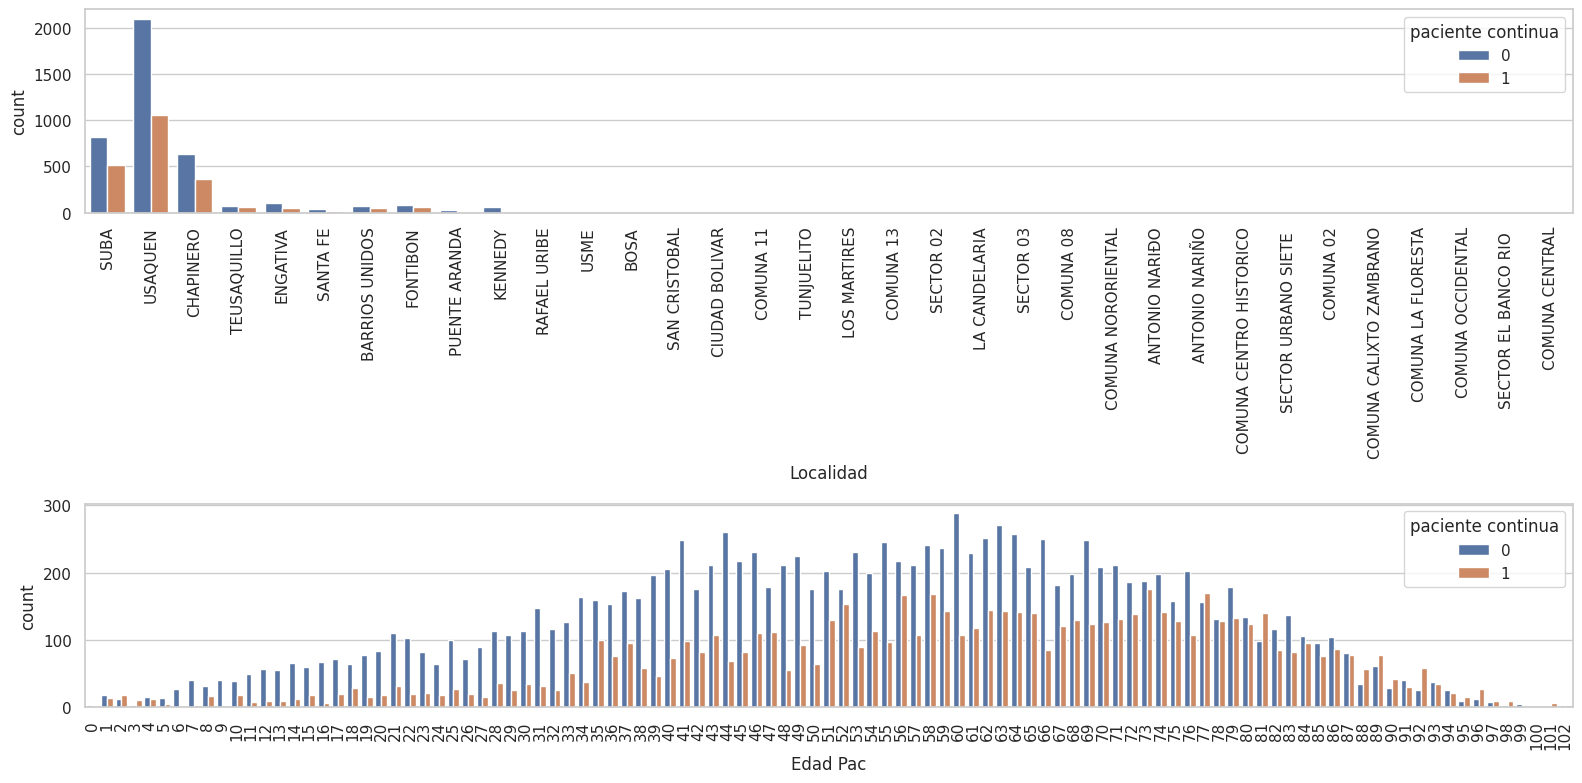

In [432]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8),)

sns.countplot(x='Localidad', data=data, ax=axes[0],hue='paciente continua')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.countplot(x='Edad Pac', data=data, ax=axes[1],hue='paciente continua')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

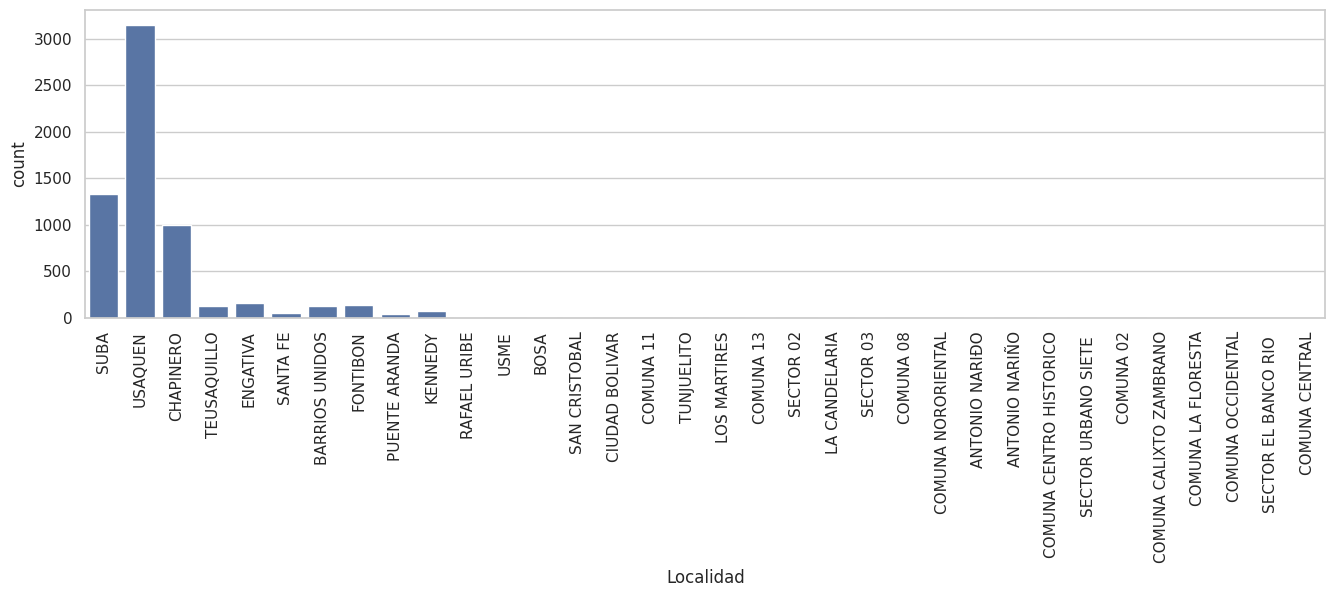

In [433]:
plt.figure(figsize=(16, 4))
sns.countplot(x='Localidad', data=data)
plt.xticks(rotation=90)
plt.show()

#Preparación de datos

###Gestión de Nulos

In [434]:

null_fields = data.isnull().sum()
for field, null_count in null_fields.items():
    if null_count > 0:
        print(f"Field '{field}' has {null_count} null values.")

Field 'Localidad' has 13496 null values.
Field 'Estado Cita' has 11176 null values.
Field 'Cod Triage' has 14073 null values.
Field 'Ocupacion Pac' has 863 null values.
Field 'Tipo Convenio' has 9 null values.
Field 'Sexo Pac' has 1 null values.


In [435]:
data.drop(columns=['Cod Triage','Estado Cita'], inplace=True)
localidad_mode = data['Localidad'].mode()[0]
data['Localidad'].fillna(value=localidad_mode, inplace=True)
data['Ocupacion Pac'].fillna('Desconocida', inplace=True)
data['Tipo Convenio'].fillna('EPS', inplace=True)
data['Sexo Pac'].fillna('Desconocido', inplace=True)
data = data.dropna(subset=['Sexo Pac'])

In [436]:
null_fields = data.isnull().sum()
for field, null_count in null_fields.items():
    if null_count > 0:
        print(f"Field '{field}' has {null_count} null values.")

### Codificar Campos Categoricos

In [437]:

campos_a_codificar = [
    'Viaje del Paciente', 'Localidad', 'Ocupacion Pac',
    'Tipo Convenio', 'Sexo Pac', 'Cod Diagnostico'
]

for campo in campos_a_codificar:
    frecuencias = data[campo].value_counts()
    data[campo] = data[campo].map(frecuencias)


In [438]:
data.head()

,Viaje del Paciente,Localidad,Ocupacion Pac,Edad Pac,Tipo Convenio,Sexo Pac,Cod Diagnostico,paciente continua
0,11398,1337,947,71,5837,10692,3389,0
1,11398,1337,947,71,2618,10692,3389,0
2,11398,16647,4507,76,2436,10692,1432,0
3,11398,16647,4507,76,2436,10692,1432,0
4,1559,16647,4507,76,2436,10692,1432,0


#Modelos de Predicción

In [439]:
X_cont = data.drop(columns=['paciente continua'])
y_cont = data['paciente continua']
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(X_cont, y_cont, test_size=0.2, random_state=42)

##Regresión Logistica

In [440]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_cont, y_train_cont)
y_pred_cont = logistic_model.predict(X_test_cont)


accuracy_cont = accuracy_score(y_test_cont, y_pred_cont)
report_cont = classification_report(y_test_cont, y_pred_cont)
print("Precisión de la Regresión Logística para la continuidad del paciente:", accuracy_cont)
print("Informe de clasificación:\n", report_cont)


Precisión de la Regresión Logística para la continuidad del paciente: 0.6810171198388721
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.69      0.93      0.79      2596
           1       0.61      0.22      0.32      1376

    accuracy                           0.68      3972
   macro avg       0.65      0.57      0.56      3972
weighted avg       0.66      0.68      0.63      3972



##Regresión Logistica con SMOTE

SMOTE es una técnica que crea ejemplos sintéticos de la clase minoritaria en un conjunto de datos para equilibrar la distribución de clases y mejorar el rendimiento de los modelos de clasificación.

In [441]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_cont_balanced, y_train_cont_balanced = smote.fit_resample(X_train_cont, y_train_cont)


print("Distribución de clases antes de SMOTE:\n", y_train_cont.value_counts())
print("Distribución de clases después de SMOTE:\n", y_train_cont_balanced.value_counts())


logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_cont_balanced, y_train_cont_balanced)
y_pred_cont = logistic_model.predict(X_test_cont)

accuracy_cont = accuracy_score(y_test_cont, y_pred_cont)
report_cont = classification_report(y_test_cont, y_pred_cont)
print("Precisión de la Regresión Logística para la continuidad del paciente:", accuracy_cont)
print("Informe de clasificación:\n", report_cont)


Distribución de clases antes de SMOTE:
 paciente continua
0    10334
1     5554
Name: count, dtype: int64
Distribución de clases después de SMOTE:
 paciente continua
1    10334
0    10334
Name: count, dtype: int64
Precisión de la Regresión Logística para la continuidad del paciente: 0.6283987915407855
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.75      0.65      0.69      2596
           1       0.47      0.59      0.53      1376

    accuracy                           0.63      3972
   macro avg       0.61      0.62      0.61      3972
weighted avg       0.65      0.63      0.64      3972



##XGBClassifier

In [442]:

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

smote = SMOTE(random_state=42)
X_train_cont_balanced, y_train_cont_balanced = smote.fit_resample(X_train_cont, y_train_cont)

# Definir el modelo de XGBoost y los parámetros para la búsqueda de hiperparámetros
xgb_model = XGBClassifier(random_state=42)
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Realizar búsqueda de hiperparámetros con Randomized Search
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_distributions,
                                   n_iter=20, cv=3, random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train_cont_balanced, y_train_cont_balanced)

# Mejor modelo encontrado por Randomized Search
best_xgb_model = random_search.best_estimator_


y_pred_cont = best_xgb_model.predict(X_test_cont)


accuracy_cont = accuracy_score(y_test_cont, y_pred_cont)
report_cont = classification_report(y_test_cont, y_pred_cont)
print("Mejores hiperparámetros:", random_search.best_params_)
print("Precisión del modelo de XGBoost para la continuidad del paciente:", accuracy_cont)
print("Informe de clasificación:\n", report_cont)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores hiperparámetros: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}
Precisión del modelo de XGBoost para la continuidad del paciente: 0.824269889224572
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      2596
           1       0.75      0.74      0.75      1376

    accuracy                           0.82      3972
   macro avg       0.81      0.81      0.81      3972
weighted avg       0.82      0.82      0.82      3972

